In [19]:
import numpy as np  
from datetime import datetime, timedelta 
import yfinance as yf 
import matplotlib.pyplot as plt 


In [20]:
stock_name = "SPY" 

end_date = datetime.today() 
n_years = 3 
start_date = end_date - timedelta(days = n_years*365)  



In [21]:
stock_data = yf.download(tickers = stock_name, start =start_date,  end = end_date ) 
stock_prices = stock_data['Adj Close'] 
log_returns = np.log(stock_prices/stock_prices.shift(1)).dropna() 
trading_days_year  = 252 
trading_days_month = 21 
volatility = log_returns.rolling(window =trading_days_month).std()*np.sqrt(trading_days_year) 


[*********************100%***********************]  1 of 1 completed


In [22]:
volatility.tail()

Date
2023-08-09    0.099353
2023-08-10    0.095375
2023-08-11    0.090926
2023-08-14    0.093199
2023-08-15    0.096822
Name: Adj Close, dtype: float64

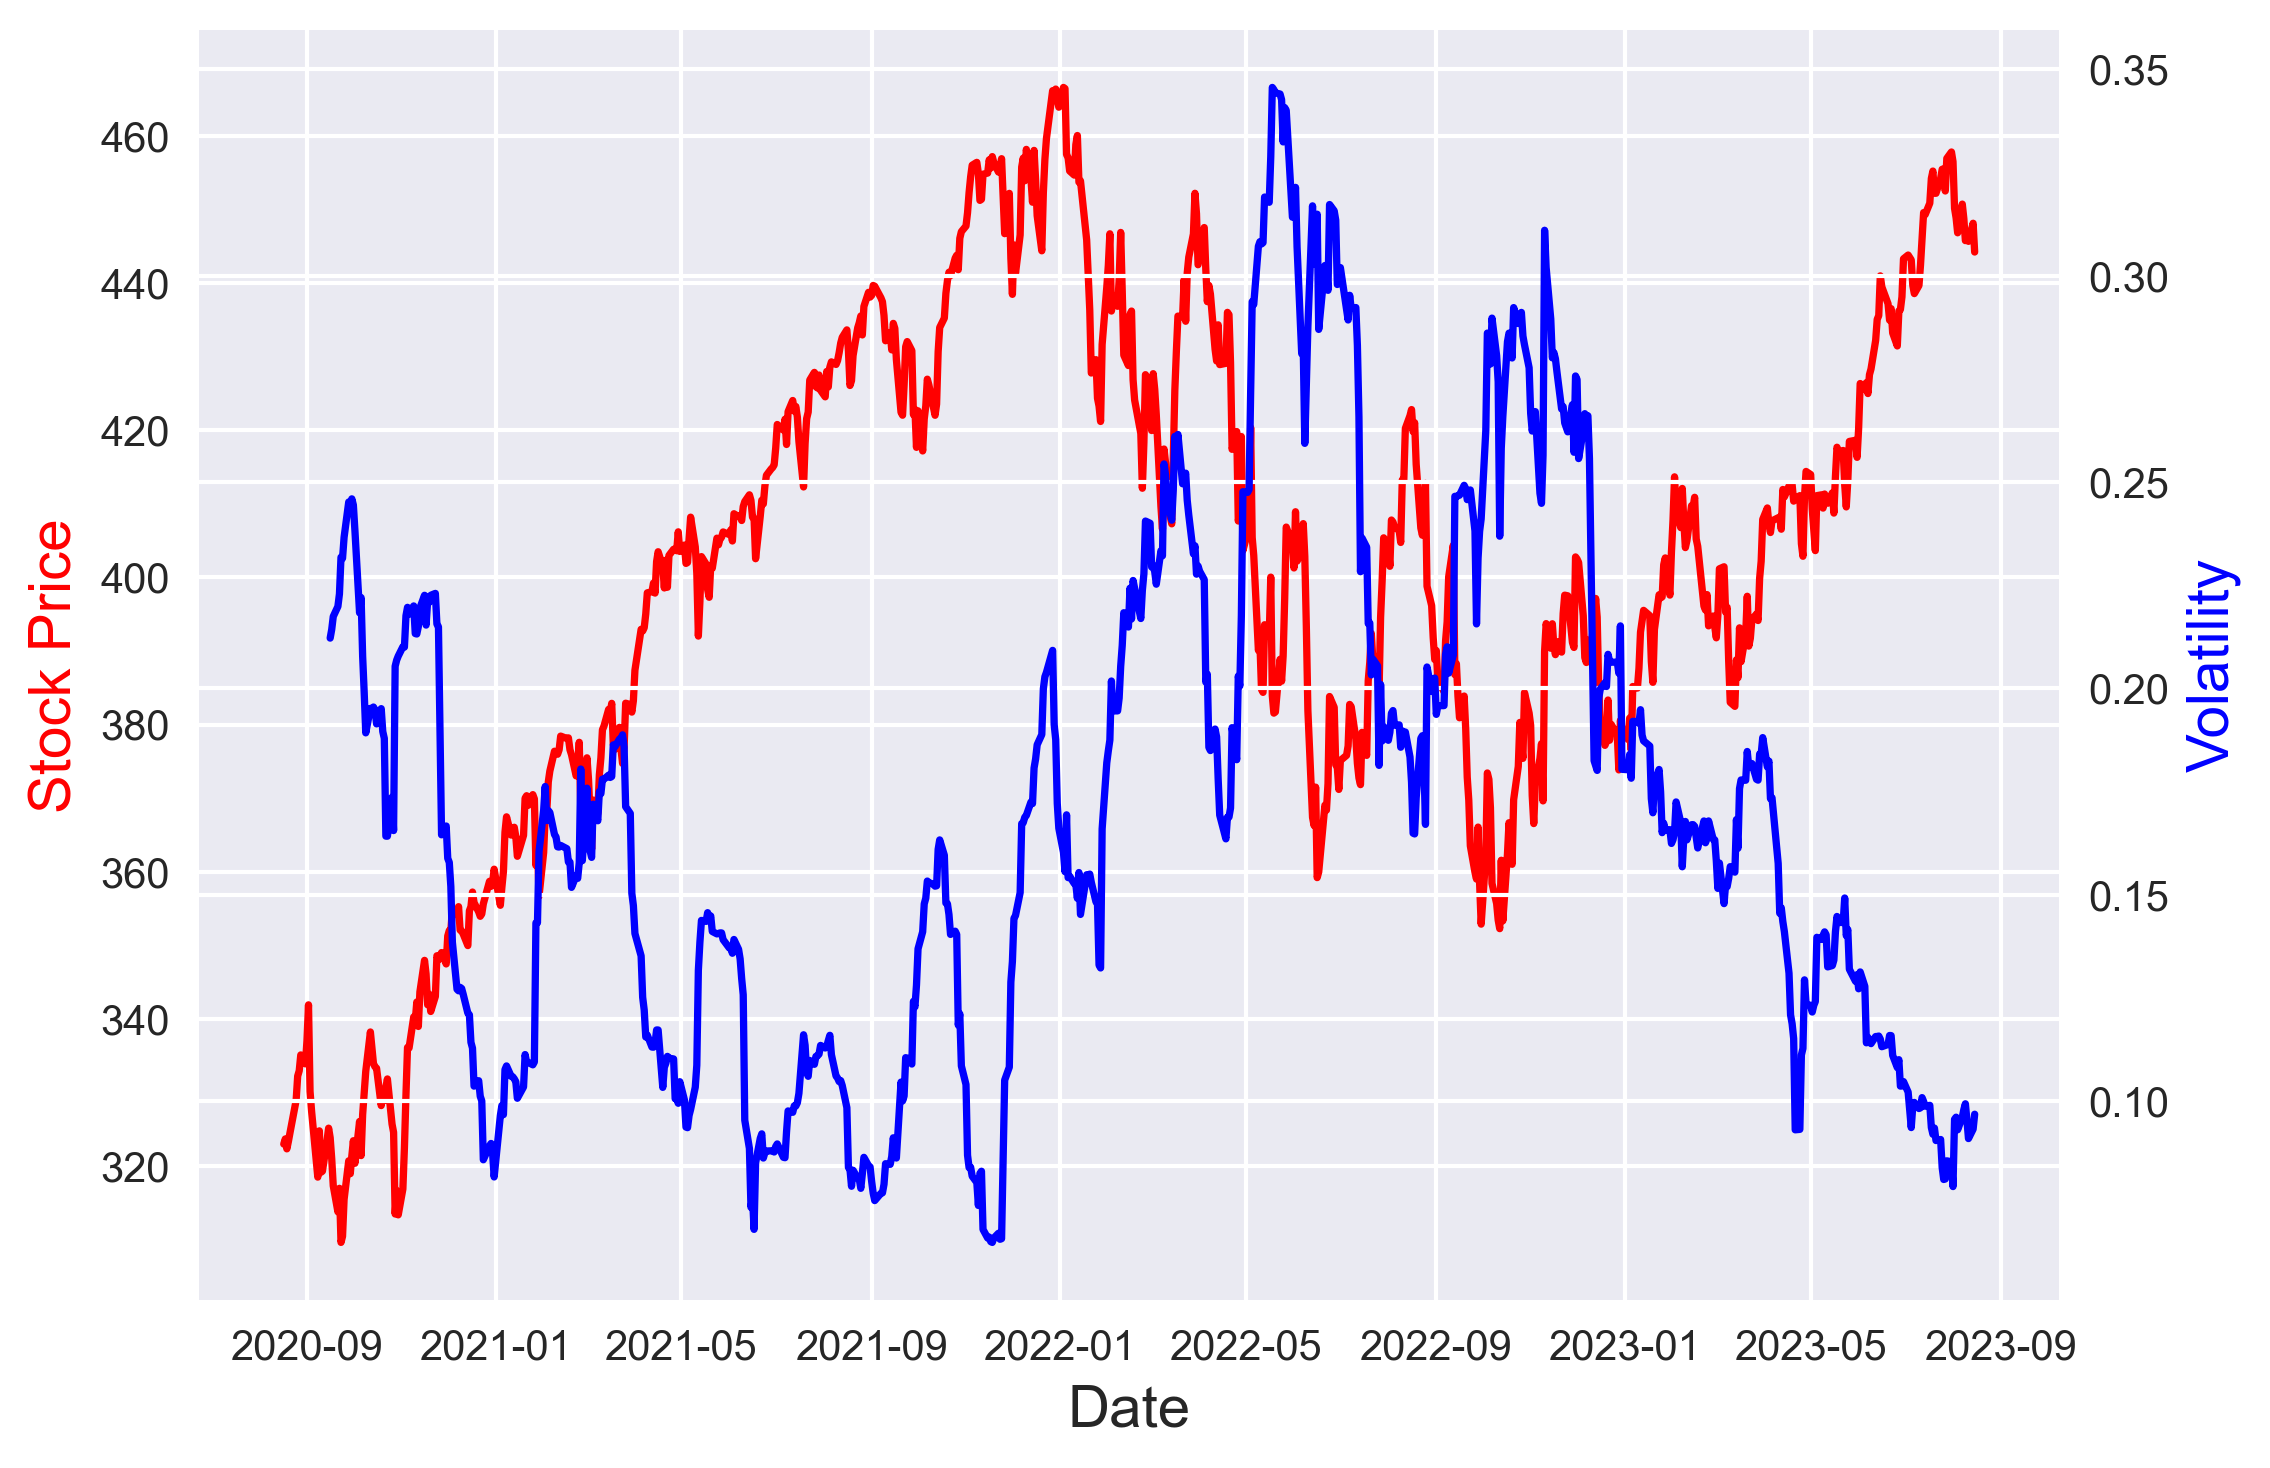

In [24]:
fig,ax = plt.subplots() 
ax.plot(stock_prices, color = "red")
ax.set_xlabel("Date", fontsize=14)
ax.set_ylabel("Stock Price",color = "red", fontsize = 14) 
ax2 = ax.twinx() 
ax2.plot(volatility, color = "blue")
ax2.set_ylabel("Volatility", color = "blue", fontsize = 14) 
plt.show()


In [27]:
from py_vollib.black_scholes import black_scholes as bs 

In [29]:
risk_free_rate = 0.05 
S0 = stock_prices[-1] 
K = S0 
T = 1
vol = volatility[-1] 
type = "c"
print("Option Price:", bs(type,S0,K,T,risk_free_rate,vol)) 

Option Price: 29.745426225162696


In [30]:
from py_vollib.black_scholes.greeks.analytical import delta, gamma, vega, theta, rho

In [34]:
delta_option = delta(type,S0,K,T,risk_free_rate,vol) 
gamma_option = gamma(type,S0,K,T,risk_free_rate,vol)
vega_option = vega(type,S0,K,T,risk_free_rate,vol)
rho_option = rho(type,S0,K,T,risk_free_rate,vol)
theta_option = theta(type,S0,K,T,risk_free_rate,vol)

In [40]:
def nb_shares_to_buy(shares_per_contract, nb_options, delta_option): 
    delta_underlying =1 
    nb_shares  = (-nb_options*delta_option/delta_underlying)*shares_per_contract 
    
    print("in order to be delta-hedged, you need to", 
         ("buy" if nb_shares>=0 else "sell"),
          round(np.abs(nb_shares),2),"shares.") 
    return nb_shares

In [41]:
shares_per_contract = 100 
nb_options =1 
nb_shares = nb_shares_to_buy(shares_per_contract,nb_options,delta_option)

in order to be delta-hedged, you need to sell 71.39 shares.
